In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
import time
import importlib

### Loading

In [2]:
import os 

In [3]:
cwd = os.getcwd()
data_dir = os.path.join(cwd, "..", "dpp", "data") 

In [4]:
data1 = pd.read_pickle(os.path.join(data_dir, "data1.pkl"))
data3 = pd.read_pickle(os.path.join(data_dir, "data3.pkl"))
data7 = pd.read_pickle(os.path.join(data_dir, "data7.pkl"))
data14 = pd.read_pickle(os.path.join(data_dir, "data14.pkl"))    
datas = [data1, data3, data7, data14]

### Fitting

In [5]:
from dpp import fit

In [6]:
def get_idxmax(l):
    
    for i, x in enumerate(l):
        if x == 0:
            break
        
    return i

In [7]:
fits_step = [fit.fit(data, 'step') for data in datas]

/home/jonas/Documents/DarkPhotonProduction/venv2_dpp/local/lib/python2.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [14]:
fits_smooth = [fit.fit(data, 'smooth') for data in datas]

fit.py line 291 - WARNING: Second matching region upper boundary out of range.
fit.py line 291 - WARNING: Second matching region upper boundary out of range.
fit.py line 291 - WARNING: Second matching region upper boundary out of range.
fit.py line 291 - WARNING: Second matching region upper boundary out of range.
fit.py line 291 - WARNING: Second matching region upper boundary out of range.
fit.py line 291 - WARNING: Second matching region upper boundary out of range.
fit.py line 291 - WARNING: Second matching region upper boundary out of range.
fit.py line 291 - WARNING: Second matching region upper boundary out of range.
fit.py line 291 - WARNING: Second matching region upper boundary out of range.
fit.py line 291 - WARNING: Second matching region upper boundary out of range.
fit.py line 291 - WARNING: Second matching region upper boundary out of range.


### Along kT

In [19]:
x = np.array([[i, i+1] for i in range(5)])

In [22]:
x.T[0]

array([0, 1, 2, 3, 4])

In [99]:
# fits = fits_step
fits = fits_smooth

n = 1000
kTmin, kTmax = 0, 15
indices = [1, 10, 80, 145]
masses = [1, 3, 7, 14]
long_frac = list()

sup = pd.DataFrame(columns=[0, 1, 2, 3], index=[1, 10, 80, 150])
inf = pd.DataFrame(columns=[0, 1, 2, 3], index=[1, 10, 80, 150])
css = pd.DataFrame(columns=[0, 1, 2, 3], index=[1, 10, 80, 150])
nlo = pd.DataFrame(columns=[0, 1, 2, 3], index=[1, 10, 80, 150])
div = pd.DataFrame(columns=[0, 1, 2, 3], index=[1, 10, 80, 150])

for i, data in enumerate(datas):
    for idx in indices:
        
        z = data.loc[0, 'z'][idx]
        long_frac.append(round(z, 3))
        kTfit = np.linspace(kTmin, kTmax, n)
        zfit = np.ones(n) * z
        
        sup.loc[idx, i] = fits[i]['sup'](zfit, kTfit)
        inf.loc[idx, i] = fits[i]['inf'](zfit, kTfit)
        css.loc[idx, i] = fits[i]['css'](zfit, kTfit)
        nlo.loc[idx, i] = fits[i]['nlo'](zfit, kTfit)
        div.loc[idx, i] = fits[i]['div'](zfit, kTfit)

<IPython.core.display.Javascript object>


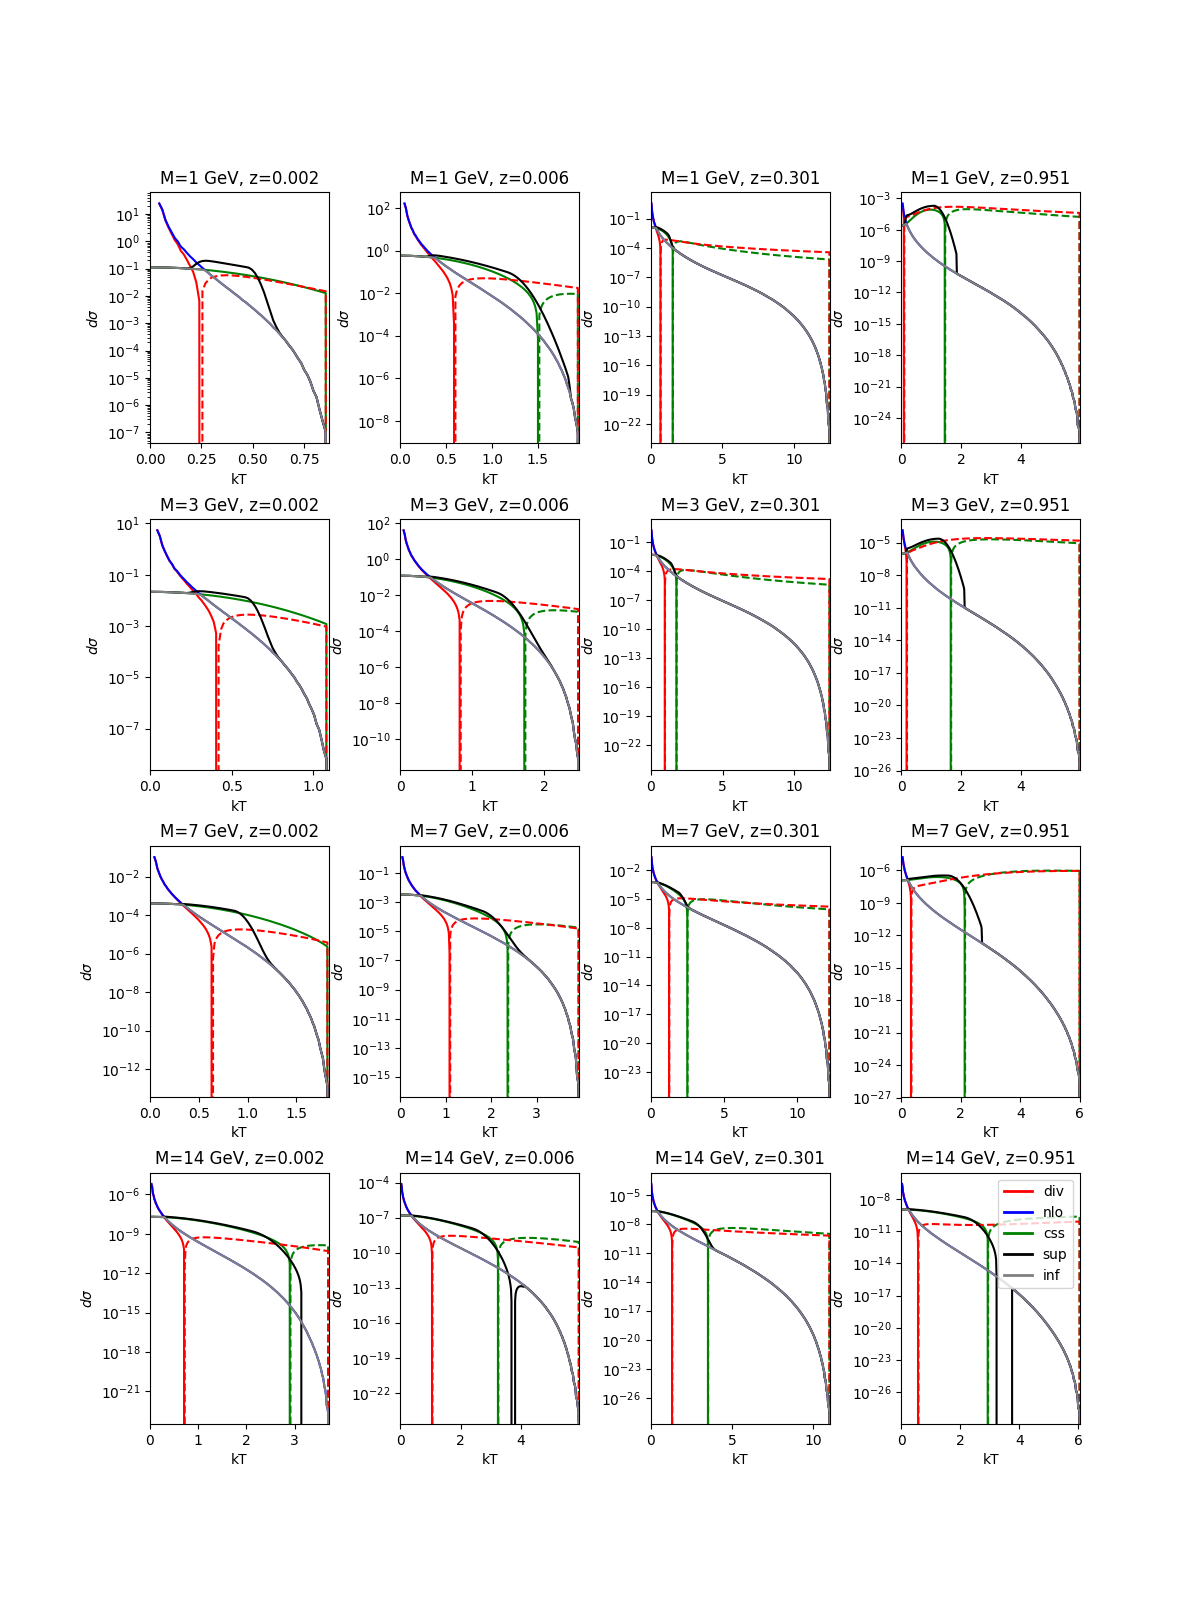

In [102]:
%matplotlib notebook

legends = [Line2D([0], [0], color='r', lw=2, label='div'),
           Line2D([0], [0], color='b', lw=2, label='nlo'),
           Line2D([0], [0], color='g', lw=2, label='css'),
           Line2D([0], [0], color='k', lw=2, label='sup'),
           Line2D([0], [0], color='gray', lw=2, label='inf')]

fig, ax = plt.subplots(4, 4, figsize=(12, 16))

for i, idx in enumerate(indices):
    for j in range(4):
        ax[j, i].plot(kTfit, css.loc[idx, j], color='g', Linestyle='-')
        ax[j, i].plot(kTfit, div.loc[idx, j], color='r', Linestyle='-')
        ax[j, i].plot(kTfit, nlo.loc[idx, j], color='b', Linestyle='-')
        ax[j, i].plot(kTfit, -css.loc[idx, j], color='g', Linestyle='--')
        ax[j, i].plot(kTfit, -div.loc[idx, j], color='r', Linestyle='--')
        ax[j, i].plot(kTfit, -nlo.loc[idx, j], color='b', Linestyle='--')
        ax[j, i].plot(kTfit, sup.loc[idx, j], color='k', Linestyle='-')
        ax[j, i].plot(kTfit, inf.loc[idx, j], color='gray', Linestyle='-')

        ax[j, i].set_xlabel('kT')
        ax[j, i].set_ylabel('$d\sigma$')
        ax[j, i].set_title('M={} GeV, z={}'.format(masses[j], long_frac[i]))
        
        ax[j, i].set(xscale='linear', yscale='log')
        if j == i == 3:
            ax[j, i].legend(handles=legends, loc='upper right')
        
        idxmax = get_idxmax(css.loc[idx, j])
        ax[j, i].set_xlim(0, kTfit[idxmax])
        
plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.show()

### Along z

In [103]:
# fits = fits_step
fits = fits_smooth

n = 1000
indices = [1, 10, 100, 195]
masses = [1, 2, 5, 10]
kTs = list()

sup = pd.DataFrame(columns=[0, 1, 2, 3], index=indices)
inf = pd.DataFrame(columns=[0, 1, 2, 3], index=indices)
css = pd.DataFrame(columns=[0, 1, 2, 3], index=indices)
nlo = pd.DataFrame(columns=[0, 1, 2, 3], index=indices)
div = pd.DataFrame(columns=[0, 1, 2, 3], index=indices)

for i, data in enumerate(datas):
    
    zmin, zmax = data.loc[0, 'z'][0], data.loc[0, 'z'][150]
    zfit = np.linspace(zmin, zmax, n)
    
    for idx in indices:
        
        kT = data.loc[idx, 'kT'][100]
        kTs.append(round(kT, 3))
        kTfit = np.ones(n) * kT
        
        sup.loc[idx, i] = fits[i]['sup'](zfit, kTfit)
        inf.loc[idx, i] = fits[i]['inf'](zfit, kTfit)
        css.loc[idx, i] = fits[i]['css'](zfit, kTfit)
        nlo.loc[idx, i] = fits[i]['nlo'](zfit, kTfit)
        div.loc[idx, i] = fits[i]['div'](zfit, kTfit)

<IPython.core.display.Javascript object>


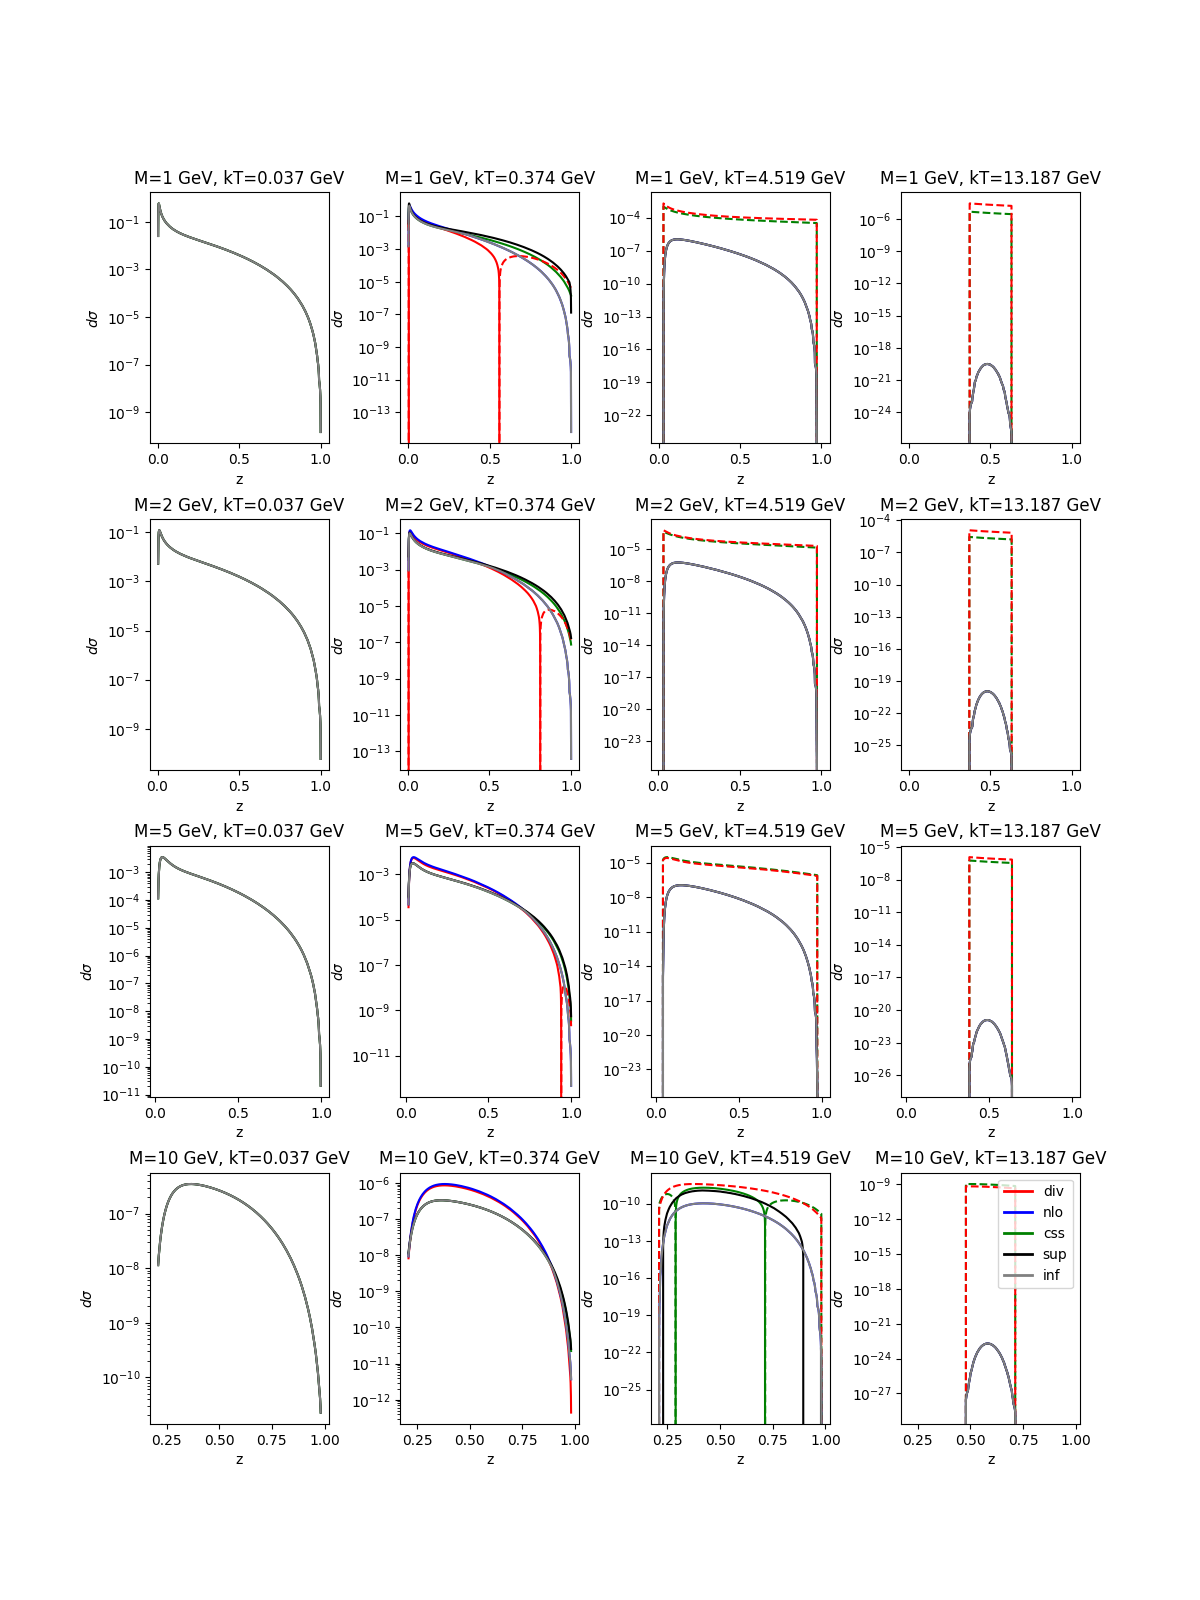

In [104]:
%matplotlib notebook

legends = [Line2D([0], [0], color='r', lw=2, label='div'),
           Line2D([0], [0], color='b', lw=2, label='nlo'),
           Line2D([0], [0], color='g', lw=2, label='css'),
           Line2D([0], [0], color='k', lw=2, label='sup'),
           Line2D([0], [0], color='gray', lw=2, label='inf')]

fig, ax = plt.subplots(4, 4, figsize=(12, 16))

for i, idx in enumerate(indices):
    for j, data in enumerate(datas):
        
        zmin, zmax = data.loc[0, 'z'][0], data.loc[0, 'z'][150]
        zfit = np.linspace(zmin, zmax, n)
        
        ax[j, i].plot(zfit, css.loc[idx, j], color='g', Linestyle='-')
        ax[j, i].plot(zfit, div.loc[idx, j], color='r', Linestyle='-')
        ax[j, i].plot(zfit, nlo.loc[idx, j], color='b', Linestyle='-')
        ax[j, i].plot(zfit, -css.loc[idx, j], color='g', Linestyle='--')
        ax[j, i].plot(zfit, -div.loc[idx, j], color='r', Linestyle='--')
        ax[j, i].plot(zfit, -nlo.loc[idx, j], color='b', Linestyle='--')
        ax[j, i].plot(zfit, sup.loc[idx, j], color='k', Linestyle='-')
        ax[j, i].plot(zfit, inf.loc[idx, j], color='gray', Linestyle='-')

        ax[j, i].set_xlabel('z')
        ax[j, i].set_ylabel('$d\sigma$')
        ax[j, i].set_title('M={} GeV, kT={} GeV'.format(masses[j], kTs[i]))
        
        ax[j, i].set(xscale='linear', yscale='log')
        if j == i == 3:
            ax[j, i].legend(handles=legends, loc='upper right')
        
plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.show()

### Error

In [158]:
import math

In [156]:
def least_squares(y, f):
    
    n = len(y)
    ls = 0
    for i in range(n):
        if y[i] == f[i] == 0:
            pass
        elif math.isnan(f[i]) or math.isnan(y[i]):
            pass
        else:
            ls += np.abs((y[i]-f[i])/(y[i]+f[i]))
    
    return ls/n

In [160]:
fits = fits_step

In [161]:
methods = ['css', 'div', 'nlo']
masses = [1, 2, 5, 10]
df = pd.DataFrame(columns=methods, index=masses)

for i, data in enumerate(datas):
    Nz, NkT = data['M'].shape
    for method in methods:
        y = data[method].values.reshape(Nz*NkT)
        z = data['z'].values.reshape(Nz*NkT)
        kT = data['kT'].values.reshape(Nz*NkT)   
        f = fits[i][method](z, kT)
        df.loc[masses[i], method] = least_squares(y, f)

In [162]:
df

css         div         nlo
1   0.00837636  0.00858333   0.0093108
2   0.00793824  0.00809507  0.00929976
5   0.00769428  0.00781725   0.0096404
10  0.00716509  0.00736738  0.00903533

### Computation time

In [33]:
import time

In [39]:
kTmin, kTmax = 0, 15
z = 0.5

n_tab = [10**i for i in range(0,9)]
comp_time = list()
for n in n_tab:
    kTfit = np.linspace(kTmin, kTmax, n)
    zfit = np.ones(n)*z
    tic = time.time()
    sup = fits['sup'](zfit, kTfit)
    tac = time.time()
    comp_time.append((tac-tic)/n)

<IPython.core.display.Javascript object>


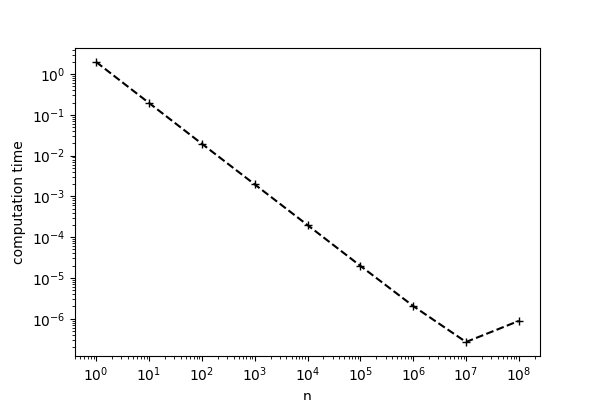

In [40]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(n_tab, comp_time, color='k', Linestyle='--', marker='+')

ax.set_xlabel('n')
ax.set_ylabel('computation time')
ax.set(xscale='log', yscale='log')

plt.show()

In [6]:
a = {'d':2, 'u':2}

In [8]:
a.keys()

['u', 'd']